In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [451]:
class NeuralNetwork:
    def __init__(self, layers, loss_function, lr =  0.003):
        self.y_hat = 0
        self.layers = layers
        self.loss_function = loss_function
        self.lr = lr

    def fit(self, X, y, iters, batch_size):
        loss = []

        for j in range(iters):
            for k in range(batch_size):
                iter = []
                i = random.randint(0,len(X)-1)
                iter.append(i)
                loss.append(self.loss_function.loss(model.forward([X[i]], False),[y[i]]))
            X_avg = np.mean(X[iter])
            y_avg = np.mean(y[iter])
            model.backward([X_avg], [y_avg])
            # loss.append(self.loss_function.loss(model.forward(X, False), y))
            # model.backward(X, y)
        return loss

    def predict(self, X):
        return self.forward(X, True)

    def forward(self, X_batch, predict):
        layer_input = X_batch
        for i in range(0, len(self.layers)):
            layer_input = self.layers[i].forward(layer_input, predict)
        return layer_input



    def backward(self, X_batch, y_batch):
        desired_neuron_value = self.loss_function.d_loss(y_batch, [neuron.curr_val for neuron in self.layers[len(self.layers)-1].neurons])
        for i in range(len(self.layers)-1, 0, -1):
            desired_neuron_value = self.layers[i].backward([neuron.curr_val for neuron in self.layers[i-1].neurons], desired_neuron_value.T, self.lr)
        desired_neuron_value = self.layers[0].backward(X_batch, desired_neuron_value.T, self.lr)




class DenseLayer:
    def __init__(self, no_neurons, activation_function, no_inputs):
        self.neurons = []
        for i in range(no_neurons):
            self.neurons.append(Neuron(activation_function, no_inputs))

    def forward(self, inputs, predict):
        output = []
        for i in range(len(self.neurons)):
            output.append(self.neurons[i].forward(inputs, predict))
        return output
    
    def backward(self, inputs, desired_neuron_values_input, lr):
        for i in range(len(self.neurons)):
            desired_neuron_values_out = np.zeros((len(self.neurons), len(self.neurons[i].weights)-1))
            desired_neuron_values_out[i] = self.neurons[i].backward(inputs, desired_neuron_values_input[i], lr)
        return desired_neuron_values_out


class Neuron:
    def __init__(self, activation_function, no_inputs):
        self.curr_val = 0
        self.err = 0
        self.activation = activation_function
        self.weights = np.random.rand(no_inputs + 1) # last weight for bias

    def forward(self, inputs, predict):
        if predict:
            return self.activation.f(np.dot(self.weights, np.concatenate((inputs, np.ones(1)), axis=0)))
        else:
            self.curr_val = self.activation.f(np.dot(self.weights, np.concatenate((inputs, np.ones(1)), axis=0))) # one at the end for bias
            return self.curr_val

    def backward(self, inputs, desired_neuron_value, lr):
        y_hat = self.curr_val
        dC = np.sum(desired_neuron_value)
        df = self.activation.df(y_hat)
        dz = np.concatenate((inputs, np.ones(1)), axis=0)
        self.err = dC * self.weights[:-1]
        self.weights += lr*dC*df*np.asanyarray(dz)
        return self.err




class SSE:
    def loss(y_out, y):
        return np.sum((np.array(y_out) - np.array(y)) ** 2 )

    def d_loss(y_out, y):
        return 2*( np.array(y_out) - np.array(y) )


class Sigmoid:
    def f(x):
        return 1/(1+np.exp(-x))

    def df(x):
        s = 1/(1+np.exp(-x))
        return s * (1-s)

class Linear:
    def f(x):
        return x

    def df(x):
        return 1

class ReLu:
    def f(x):
        return np.max(np.concatenate(([x], np.zeros(1)), axis=0))

    def df(x):
        return 1 if x > 1 else 0


p = [3,7]

L_BOUND = -5
U_BOUND = 5

def q(x):
    return np.sin(x*np.sqrt(p[0]+1))+np.cos(x*np.sqrt(p[1]+1))

x = np.linspace(L_BOUND, U_BOUND, 100)
y = q(x)

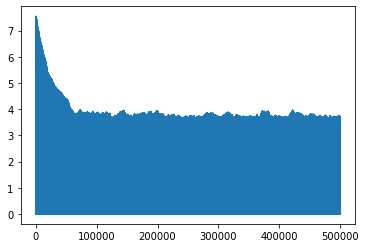

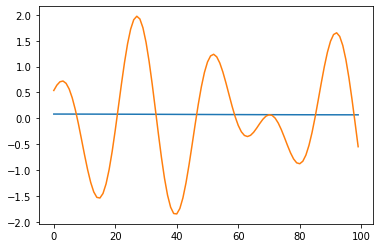

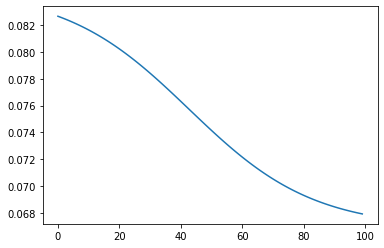

In [7]:
X_train, y_train = x, y


no_inputs, no_outputs = 1, 1
l1_no_neurons, l2_no_neurons = 1, 1
loss = SSE


l1 = DenseLayer(l1_no_neurons, Sigmoid, no_inputs)
l2 = DenseLayer(l2_no_neurons, Sigmoid, l1_no_neurons)
l3 = DenseLayer(no_outputs, Linear, l2_no_neurons)

model = NeuralNetwork([l1, l2, l3], SSE, 0.001)

history = model.fit(X_train, y_train, 5000, 100)

plt.figure(1)
plt.plot(history)

preds = []
for i in range(len(X_train)):
    preds.append(model.predict([X_train[i]]))

plt.figure(2)
plt.plot(preds)
plt.plot(y_train)

plt.figure(3)
plt.plot(preds)

In [21]:
model.forward([x[0]], False)

[0.08265532853950022]

In [393]:
a_true = 4.6
noise = 1


x = np.arange((100))
y = x*a_true + np.random.rand((100))*noise

# INITIALIZE
X_train, y_train = x, y

no_inputs, no_outputs = 1, 1
l1_no_neurons, l2_no_neurons = 1, 1
loss = SSE


l1 = DenseLayer(l1_no_neurons, Sigmoid, no_inputs)
l2 = DenseLayer(l2_no_neurons, Sigmoid, l1_no_neurons)
l3 = DenseLayer(no_outputs, Linear, l2_no_neurons)

model = NeuralNetwork([l1, l2, l3], SSE, 0.0001)

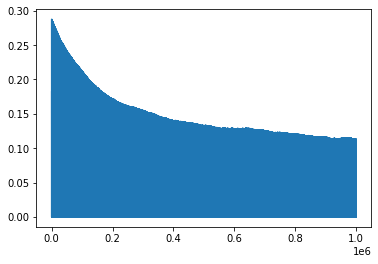

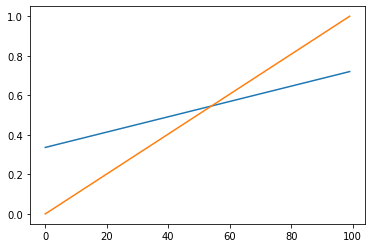

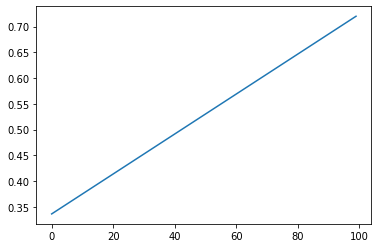

In [448]:
a_true = 4.6
noise = 0


x = np.arange((100))
y = x*a_true + np.random.rand((100))*noise
x = x /np.max(x)
y /= np.max(y)

# INITIALIZE
X_train, y_train = x, y

no_inputs, no_outputs = 1, 1
l1_no_neurons, l2_no_neurons = 1, 1
loss = SSE


l1 = DenseLayer(l1_no_neurons, ReLu, no_inputs)
l2 = DenseLayer(l2_no_neurons, ReLu, l1_no_neurons)
l3 = DenseLayer(no_outputs, Linear, l2_no_neurons)

model = NeuralNetwork([l1, l2, l3], SSE, 0.0001)

# FIT
history = model.fit(X_train, y_train, 10000, 100)

plt.figure(1)
plt.plot(history)

preds = []
for i in range(len(X_train)):
    preds.append(model.predict([X_train[i]]))

plt.figure(2)
plt.plot(preds)
plt.plot(y_train)

plt.figure(3)
plt.plot(preds)

In [454]:
# STEP
iter = np.random.randint(len(x))
model.forward([x[iter]], True)
model.backward([x[iter]], [y[iter]])

for i in range(len(model.layers)):
    print(model.layers[i].neurons[0].weights, model.layers[i].neurons[0].curr_val)

print(f"input: {x[iter]} prediction: {model.forward([x[iter]], False)}, true: {y[iter]}")

[0.63371972 0.62974549] 0.5532144997765382
[ 0.0837739   0.21023596  0.77260755 -0.00899457  0.69624214  0.30666424
  0.13983462  0.89234949  0.93138344  0.09733685  0.22928142  0.41727044
  0.25101677  0.04804868  0.38417198  0.4608536   0.66817278  0.38798698
  0.39720598  0.70796618  0.19666036  0.40609196  0.69432395  0.50267552
  0.37645984  0.13817757  0.0854484  -0.03831582  0.27048688  0.26577294
  0.21883505  0.51651799  0.66346949 -0.02775155  0.18014191 -0.00290163
  0.68398923  0.4684885   0.38333232  0.57110492  0.14249487  0.20150886
 -0.04175775  0.61573712  0.40135509  0.35925204  0.55397233  0.83339996
  0.81677824  0.28325968 -0.02226578] 0.9999526626611125
[ 0.42283939 -0.32500488  0.0847576  -0.22684216  0.16392016  0.36550154
  0.41407861  0.17473501  0.31028702 -0.35301367  0.17735887  0.46120751
 -0.19732679  0.11091823 -0.03944391  0.48264546 -0.0781646   0.01710685
 -0.36160669  0.37359436  0.3781414   0.18317459  0.36945062 -0.26172535
 -0.29402548 -0.25737832

In [397]:
model.layers[0].neurons[0].weights[:-1]

array([6611722.3664438])

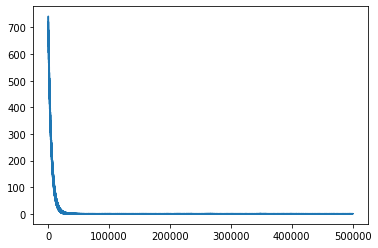

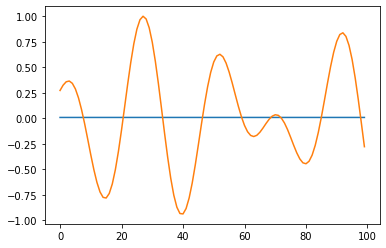

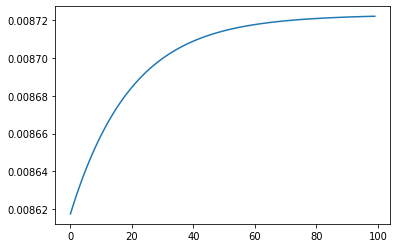

In [453]:
x = x /np.max(x)
y /= np.max(y)
X_train, y_train = x, y


no_inputs, no_outputs = 1, 1
l1_no_neurons, l2_no_neurons = 50, 50
loss = SSE


l1 = DenseLayer(l1_no_neurons, Sigmoid, no_inputs)
l2 = DenseLayer(l2_no_neurons, Sigmoid, l1_no_neurons)
l3 = DenseLayer(no_outputs, Linear, l2_no_neurons)

model = NeuralNetwork([l1, l2, l3], SSE, 0.0001)

history = model.fit(X_train, y_train, 5000, 100)

plt.figure(1)
plt.plot(history)

preds = []
for i in range(len(X_train)):
    preds.append(model.predict([X_train[i]]))

plt.figure(2)
plt.plot(preds)
plt.plot(y_train)

plt.figure(3)
plt.plot(preds)

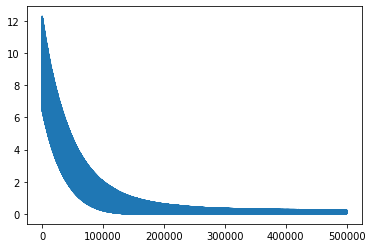

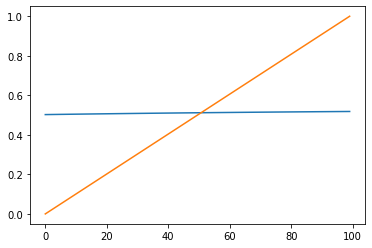

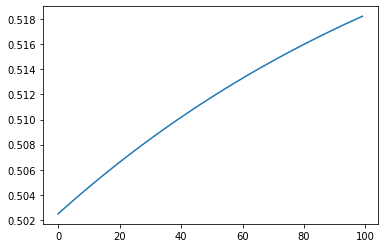

In [450]:
x = x /np.max(x)
y /= np.max(y)
X_train, y_train = x, y


no_inputs, no_outputs = 1, 1
l1_no_neurons, l2_no_neurons = 10, 5
loss = SSE


l1 = DenseLayer(l1_no_neurons, Sigmoid, no_inputs)
l2 = DenseLayer(l2_no_neurons, Sigmoid, l1_no_neurons)
l3 = DenseLayer(no_outputs, Linear, l2_no_neurons)

model = NeuralNetwork([l1, l2, l3], SSE, 0.0001)

history = model.fit(X_train, y_train, 5000, 100)

plt.figure(1)
plt.plot(history)

preds = []
for i in range(len(X_train)):
    preds.append(model.predict([X_train[i]]))

plt.figure(2)
plt.plot(preds)
plt.plot(y_train)

plt.figure(3)
plt.plot(preds)

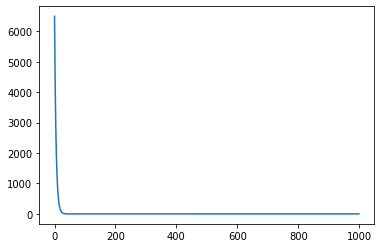

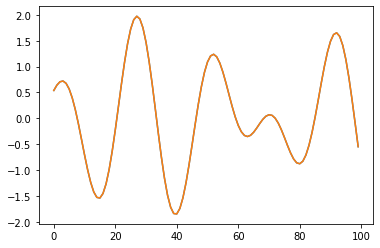

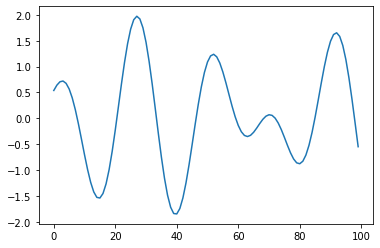

In [149]:
X_train, y_train = x, y


no_inputs, no_outputs = 100, 100
l1_no_neurons, l2_no_neurons = 30, 15
loss = SSE


l1 = DenseLayer(l1_no_neurons, Sigmoid, no_inputs)
l2 = DenseLayer(l2_no_neurons, Sigmoid, l1_no_neurons)
l3 = DenseLayer(no_outputs, Linear, l2_no_neurons)

model = NeuralNetwork([l1, l2, l3], SSE)

history = model.fit(X_train, y_train, 1000)

plt.figure(1)
plt.plot(history)

plt.figure(2)
plt.plot(model.predict(X_train))
plt.plot(y_train)

plt.figure(3)
plt.plot(model.predict(X_train))

# Wnioski

Gdy w ostatniej warstie na aktywacji jest Sigmoida to sieć przewiduje tlyko wartości od zera do 1 (wow 300 iq)